In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
test_dir = '/kaggle/input/malaria-detection-dataset/Dataset/Test'
train_dir = '/kaggle/input/malaria-detection-dataset/Dataset/Train'


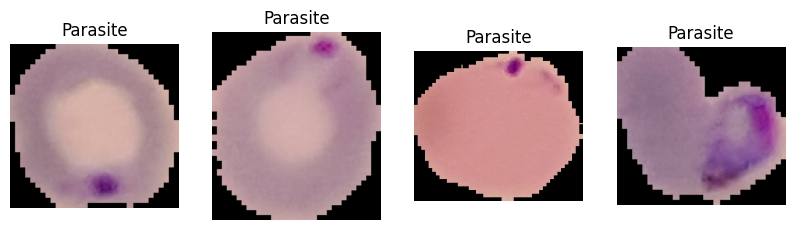

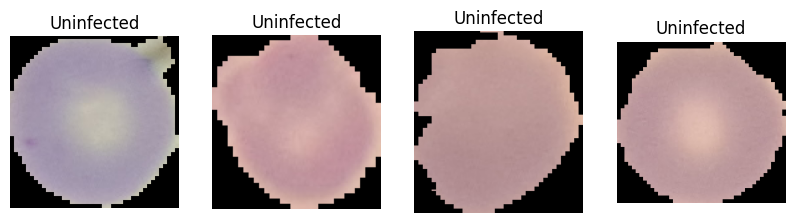

In [3]:
def plot_sample_images(folder, category, num_images=4):
    """Visualize sample images."""
    images_path = os.listdir(os.path.join(folder, category))
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        img_path = os.path.join(folder, category, images_path[i])
        img = plt.imread(img_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(category)
        plt.axis('off')
    plt.show()

# Display sample images
plot_sample_images(train_dir, 'Parasite')
plot_sample_images(train_dir, 'Uninfected')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


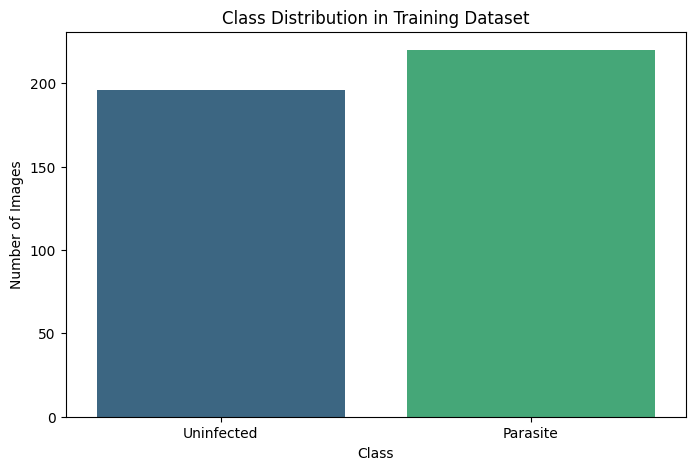

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


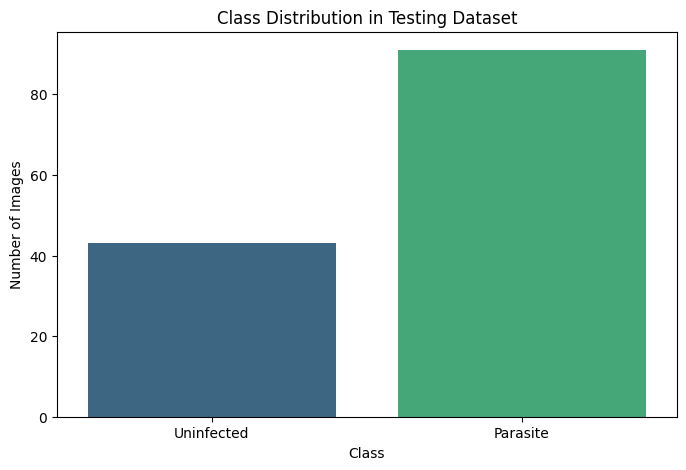

In [13]:
def count_images_in_dir(directory):
    categories = os.listdir(directory)
    counts = {category: len(os.listdir(os.path.join(directory, category))) for category in categories}
    return counts

# Count images in train and test directories
train_counts = count_images_in_dir(train_dir)
test_counts = count_images_in_dir(test_dir)
# Plot class distribution
def plot_class_distribution(counts, title):
    plt.figure(figsize=(8, 5))
    sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette='viridis')
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.show()

plot_class_distribution(train_counts, "Class Distribution in Training Dataset")
plot_class_distribution(test_counts, "Class Distribution in Testing Dataset")


In [4]:
# Data Generators
img_size = 128  # Resize images to 128x128
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)


Found 416 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


In [5]:
# CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Train the Model
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20
)

# Save the Model
model.save('malaria_cnn_model.h5')


Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 675ms/step - accuracy: 0.5452 - loss: 0.7112 - val_accuracy: 0.6567 - val_loss: 0.6931
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 558ms/step - accuracy: 0.6419 - loss: 0.6212 - val_accuracy: 0.3507 - val_loss: 0.8200
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 612ms/step - accuracy: 0.6296 - loss: 0.6263 - val_accuracy: 0.6791 - val_loss: 0.6643
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 587ms/step - accuracy: 0.6782 - loss: 0.5685 - val_accuracy: 0.4851 - val_loss: 0.7203
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 540ms/step - accuracy: 0.7860 - loss: 0.4816 - val_accuracy: 0.4403 - val_loss: 0.8685
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 548ms/step - accuracy: 0.8359 - loss: 0.3950 - val_accuracy: 0.4254 - val_loss: 1.0234
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 603ms/step - accuracy: 0.8254 - loss: 0.4260 - val_accuracy: 0.6567 - val_loss: 0.6706
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 558ms/step - accuracy: 0.8557 - loss: 0.3803 - val_accuracy: 0.7388 - v

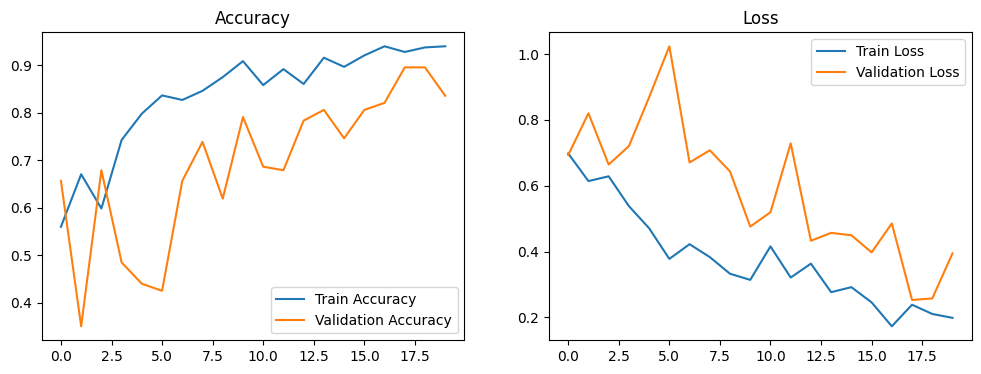

In [7]:
# Plot Training History
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss')
    plt.show()

plot_training_history(history)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step


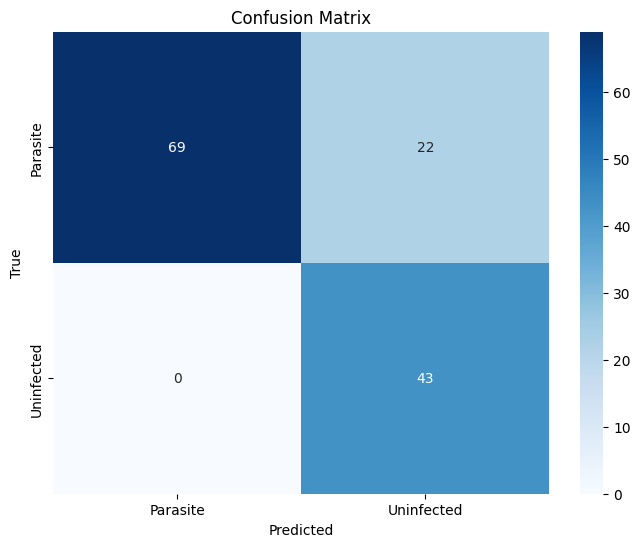

In [8]:
# Evaluate the Model
y_pred = model.predict(test_generator)
y_pred_classes = (y_pred > 0.5).astype('int')

cm = confusion_matrix(test_generator.classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Parasite', 'Uninfected'], yticklabels=['Parasite', 'Uninfected'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [9]:
print(classification_report(test_generator.classes, y_pred_classes, target_names=['Parasite', 'Uninfected']))

              precision    recall  f1-score   support

    Parasite       1.00      0.76      0.86        91
  Uninfected       0.66      1.00      0.80        43

    accuracy                           0.84       134
   macro avg       0.83      0.88      0.83       134
weighted avg       0.89      0.84      0.84       134



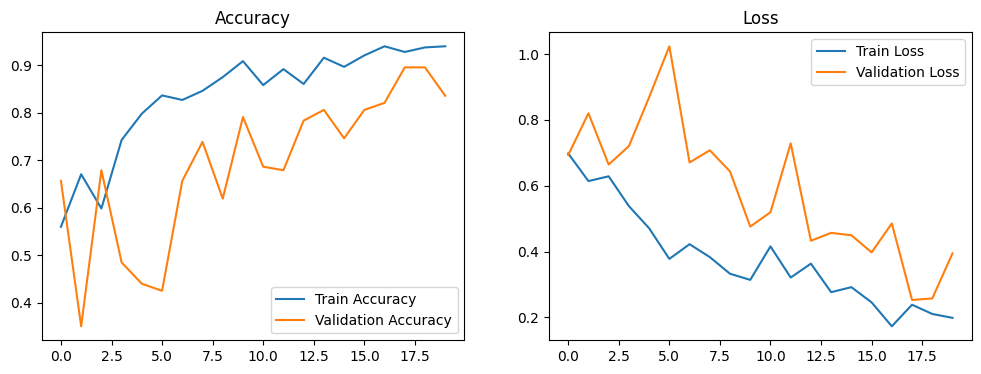

In [17]:
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


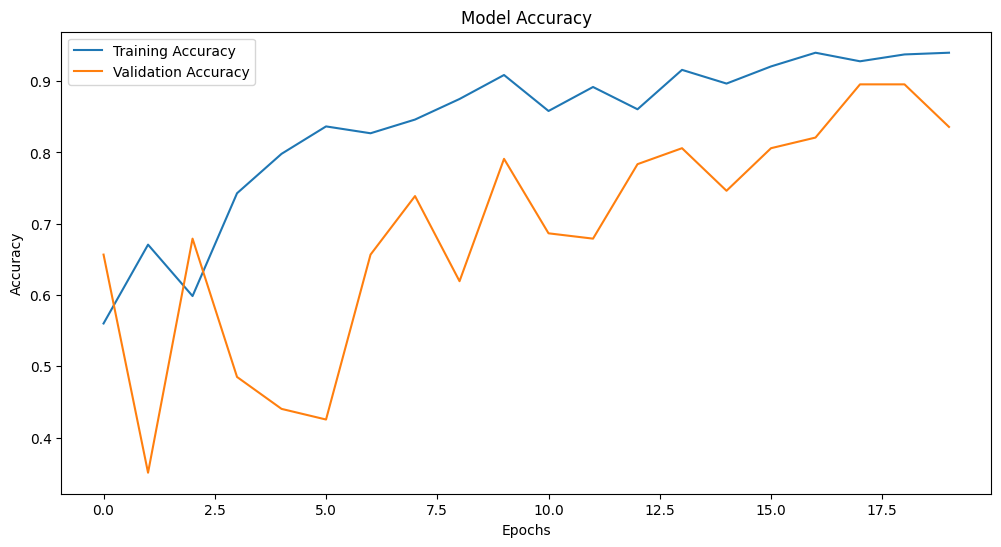

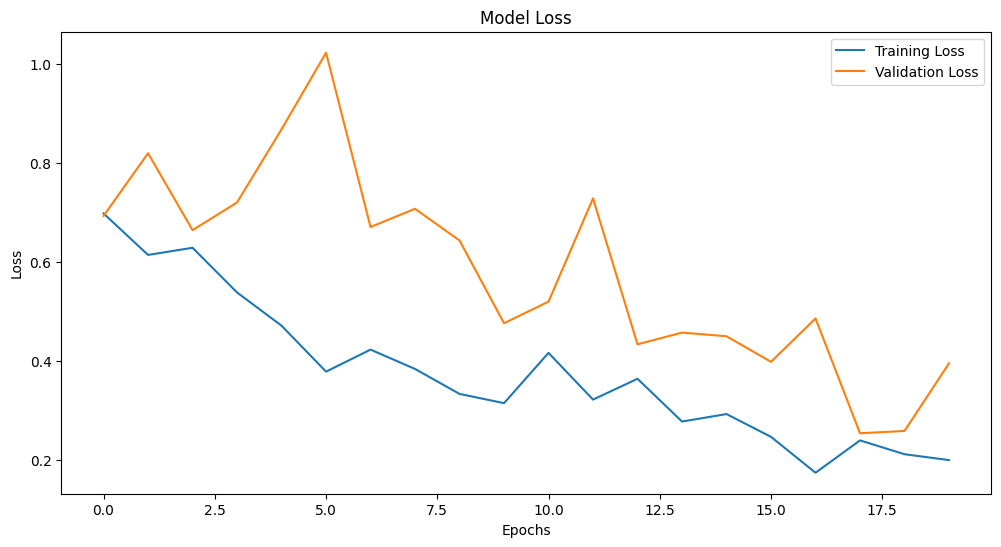

In [18]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
